In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
street = pd.read_csv('../data/processed/street_clean.csv')
street['month'] = pd.to_datetime(street['month'])
print(f"{len(street):,} rows loaded")
street.head()

468,342 rows loaded


,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,force
0,3805030082ced818125d730fd7c0a1c6087320be923ce7...,2023-12-01,-1.376936,53.098607,On or near Mansfield Road,E01019400,Amber Valley 001A,Drugs,Court result unavailable,derbyshire
1,ecb65a50a49b09cc5378e4f83459050e8e05db315eea08...,2023-12-01,-1.373582,53.099210,On or near Catherine Street,E01019400,Amber Valley 001A,Public order,Unable to prosecute suspect,derbyshire
2,49ae18115c1bd911c2a6bc178553681a5800b64b59b7ba...,2023-12-01,-1.374915,53.103055,On or near Tavistock Square,E01019400,Amber Valley 001A,Violence and sexual offences,Court result unavailable,derbyshire
3,NaN,2023-12-01,-1.381946,53.101240,On or near Cedar Avenue,E01019400,Amber Valley 001A,Anti-social behaviour,NaN,derbyshire
4,d2530e8c1f64fb5638533662d9c22e219b2cc4834ae57d...,2023-12-01,-1.373886,53.099904,On or near Catherine Court,E01019400,Amber Valley 001A,Other theft,Investigation complete; no suspect identified,derbyshire


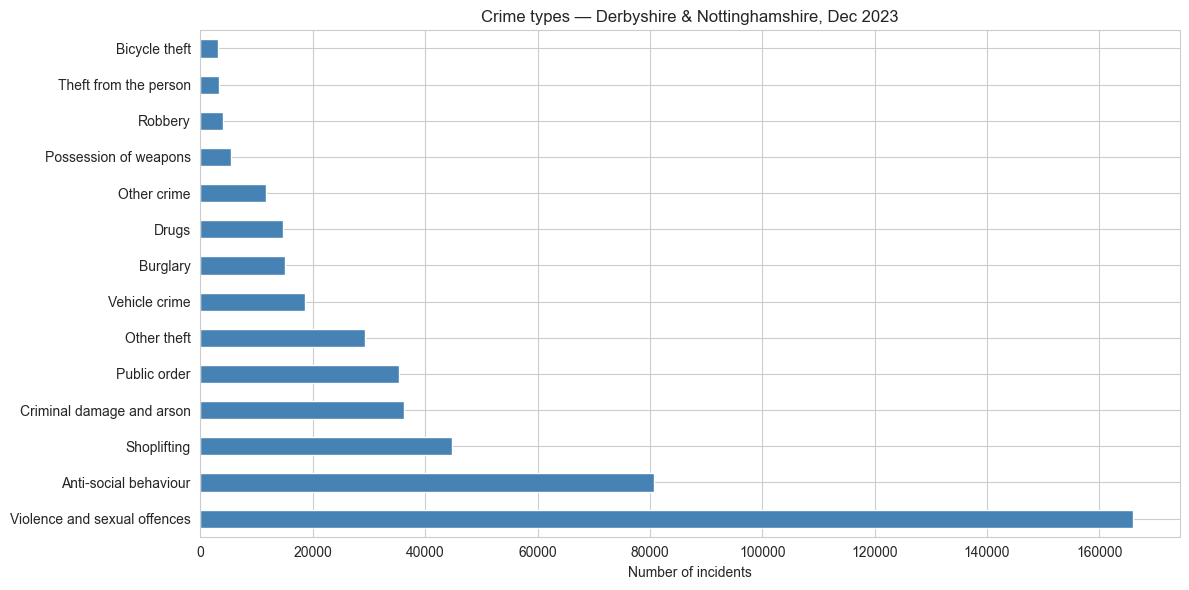

In [6]:
crime_counts = street['crime_type'].value_counts()

fig, ax = plt.subplots()
crime_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Crime types — Derbyshire & Nottinghamshire, Dec 2023')
ax.set_xlabel('Number of incidents')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('../outputs/figures/crime_types.png', dpi=150)
plt.show()

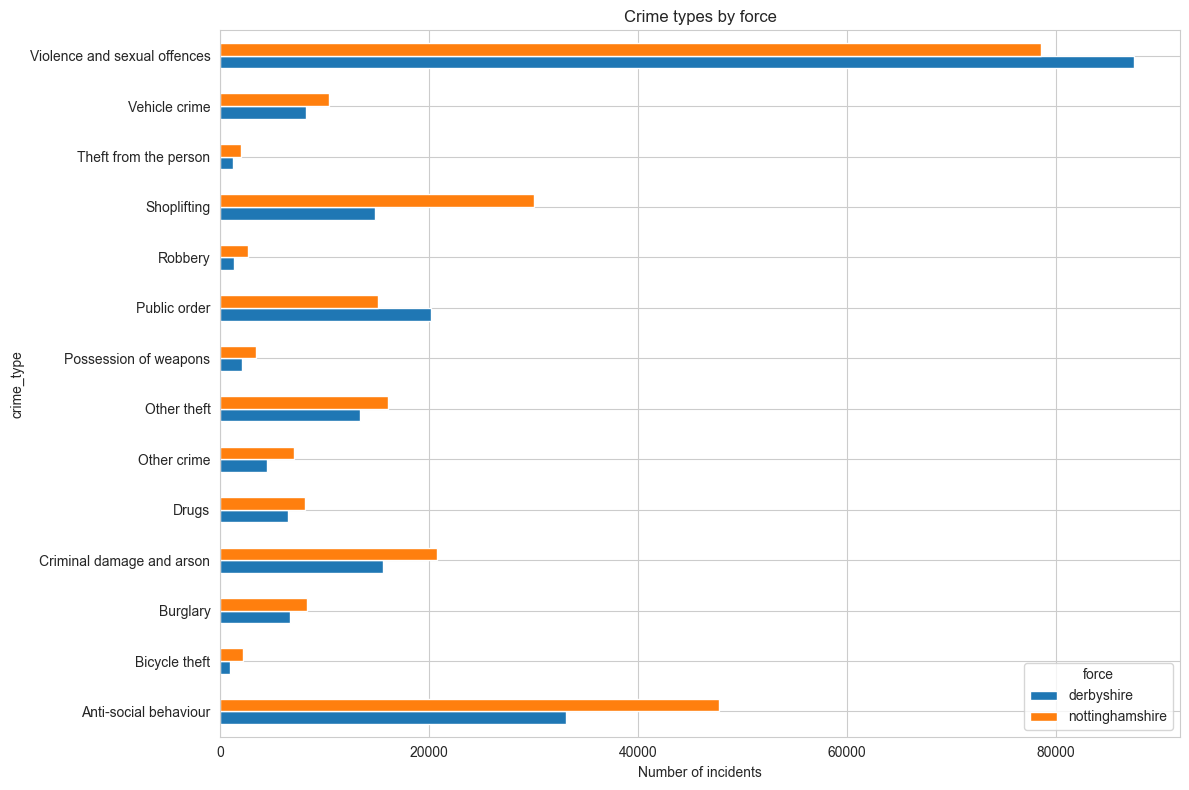

In [7]:
force_crime = street.groupby(['force', 'crime_type']).size().unstack(fill_value=0)

force_crime.T.plot(kind='barh', figsize=(12, 8))
plt.title('Crime types by force')
plt.xlabel('Number of incidents')
plt.tight_layout()
plt.savefig('../outputs/figures/crime_by_force.png', dpi=150)
plt.show()

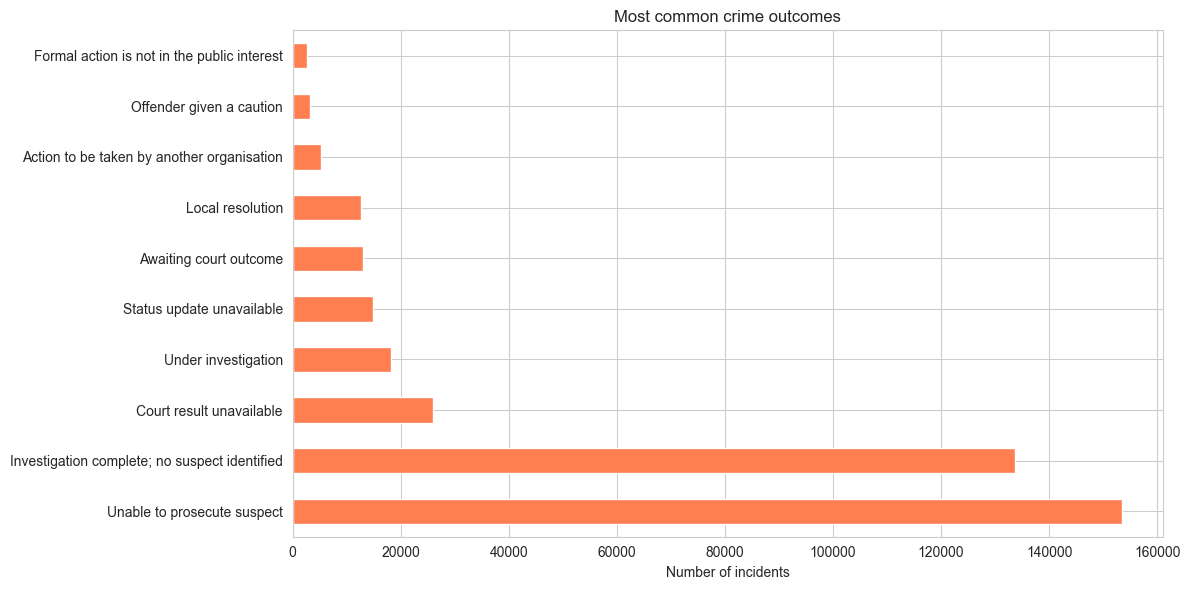

In [8]:
outcome_counts = street['last_outcome_category'].value_counts().head(10)

fig, ax = plt.subplots()
outcome_counts.plot(kind='barh', ax=ax, color='coral')
ax.set_title('Most common crime outcomes')
ax.set_xlabel('Number of incidents')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('../outputs/figures/outcomes.png', dpi=150)
plt.show()